In [1]:
#Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Importa os dados do arquivo CSV e monta o DataFrame com a Base de Dados
#Estatísticas de segurança: série histórica mensal por área de Unidade de Polícia Pacificadora (01/2007 a 06/2021)
dfBD = pd.read_csv("https://www.ispdados.rj.gov.br/Arquivos/UppEvolucaoMensalDeTitulos.csv", delimiter=";", encoding="latin1")
dfBD.head(2)

,cod_upp,upp,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,...,armas_apreendidas,cump_mandado_prisao,ocorr_flagrante,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias
0,1,Santa Marta,2007,1,0,0,0,0,0,1,...,2,1,0,0,0,0,0,0,0,11
1,2,Cidade de Deus,2007,1,3,0,0,0,1,18,...,7,2,11,7,2,0,0,0,0,98


In [3]:
#Soma os valores da coluna de apreensão de drogas (apreensao_drogas) por UPP (cod_upp)
dfBDApreensaoDrogas = dfBD.groupby("cod_upp")["apreensao_drogas"].sum().reset_index()
dfBDApreensaoDrogas.head(2)


,cod_upp,apreensao_drogas
0,1,228
1,2,2818


In [4]:
#Cria o array com os dados de apreensão de drogas
arrayApreensaoDrogas = np.array(dfBDApreensaoDrogas["apreensao_drogas"])
arrayApreensaoDrogas

array([ 228, 2818,  310,  361,  655,  538,  716,  555,  205,  389,  306,
        441,  312,  486,  226,  500,  774,  618,  302,  259,  286,  295,
        257,  163,  121,  107,  549,  636, 1132,  526,  627,  275,  122,
        598,  415,  245,  590, 1363])

In [5]:
#Cálculos estatísticos
mediaAPDrogas = np.mean(arrayApreensaoDrogas)
medianaAPDrogas = np.median(arrayApreensaoDrogas)
q1APDrogas = np.percentile(arrayApreensaoDrogas, 25)
q2APDrogas = np.percentile(arrayApreensaoDrogas, 50)
q3APDrogas = np.percentile(arrayApreensaoDrogas, 75)
distanciaAPDrogas = (mediaAPDrogas - medianaAPDrogas) / medianaAPDrogas
iqrAPDrogas = q3APDrogas - q1APDrogas
limSupAPDrogas = q3APDrogas + (1.5 * iqrAPDrogas)
limInfAPDrogas = q1APDrogas - (1.5 * iqrAPDrogas)

print(f'Média     = {mediaAPDrogas:.2f}')
print(f'Mediana   = {medianaAPDrogas:.2f}')
print(f'Q1        = {q1APDrogas:.2f}')
print(f'Q2        = {q2APDrogas:.2f}')
print(f'Q3        = {q3APDrogas:.2f}')
print(f'Distância = {distanciaAPDrogas * 100:.2f} %')       #Em percentual
print(f'Lim. Sup. = {limSupAPDrogas:.2f}')
print(f'Lim. Inf. = {limInfAPDrogas:.2f}')

Média     = 508.05
Mediana   = 402.00
Q1        = 263.00
Q2        = 402.00
Q3        = 596.00
Distância = 26.38 %
Lim. Sup. = 1095.50
Lim. Inf. = -236.50


In [11]:
#UPPs que representam os OUTLIERS com MAIOR número de apreensão de drogas
dpApreensaoDrogasMaiorOutlier = dfBDApreensaoDrogas.loc[dfBDApreensaoDrogas["apreensao_drogas"] >= limSupAPDrogas]
dpApreensaoDrogasMaiorOutlier.sort_values(by="apreensao_drogas", ascending=False)

,cod_upp,apreensao_drogas
1,2,2818
37,38,1363
28,29,1132


In [7]:
##########################################################################################################
#RESPOSTA:
#As UPPs acima estão acima do limite superior e são consideradas OUTLIERS em relação a apreensão de drogas
##########################################################################################################

C:\Users\paulo.frederico\AppData\Local\Temp\ipykernel_38360\2214932497.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dpApreensaoDrogasMaiorOutlier['cod_upp'] = dpApreensaoDrogasMaiorOutlier['cod_upp'].astype(str)
C:\Users\paulo.frederico\AppData\Local\Temp\ipykernel_38360\2214932497.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dpApreensaoDrogasMaiorOutlier.sort_values(by="apreensao_drogas", ascending=False, inplace=True)


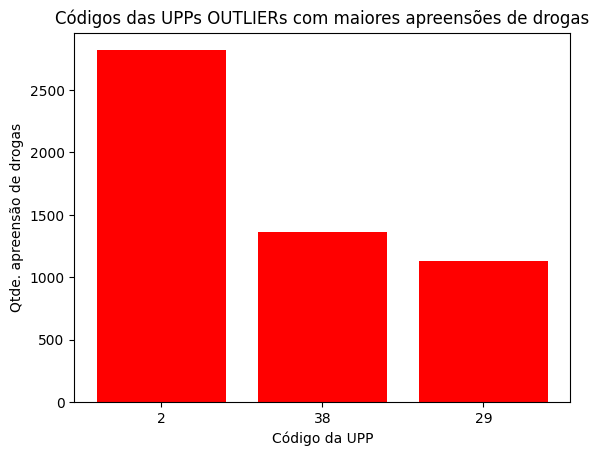

In [12]:
#OBS: Passo a coluna cod_upp para STRING para não aparecer no gráfco valores intermediários
dpApreensaoDrogasMaiorOutlier['cod_upp'] = dpApreensaoDrogasMaiorOutlier['cod_upp'].astype(str)

#Ordeno pela quantidade de apreensão de drogas antes de exibir o gráfico
dpApreensaoDrogasMaiorOutlier.sort_values(by="apreensao_drogas", ascending=False, inplace=True)

#Gero o gráfico
plt.bar(dpApreensaoDrogasMaiorOutlier['cod_upp'], dpApreensaoDrogasMaiorOutlier['apreensao_drogas'], color='red')
plt.title('Códigos das UPPs OUTLIERs com maiores apreensões de drogas')
plt.xlabel('Código da UPP')
plt.ylabel('Qtde. apreensão de drogas')
plt.grid(False)
plt.show()